In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
boston_df = pd.read_csv("C:\\Users\\DELL\\Downloads\\BOSTON\\boston.csv")

In [3]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [8]:
boston_df.shape

(506, 14)

In [9]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [10]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


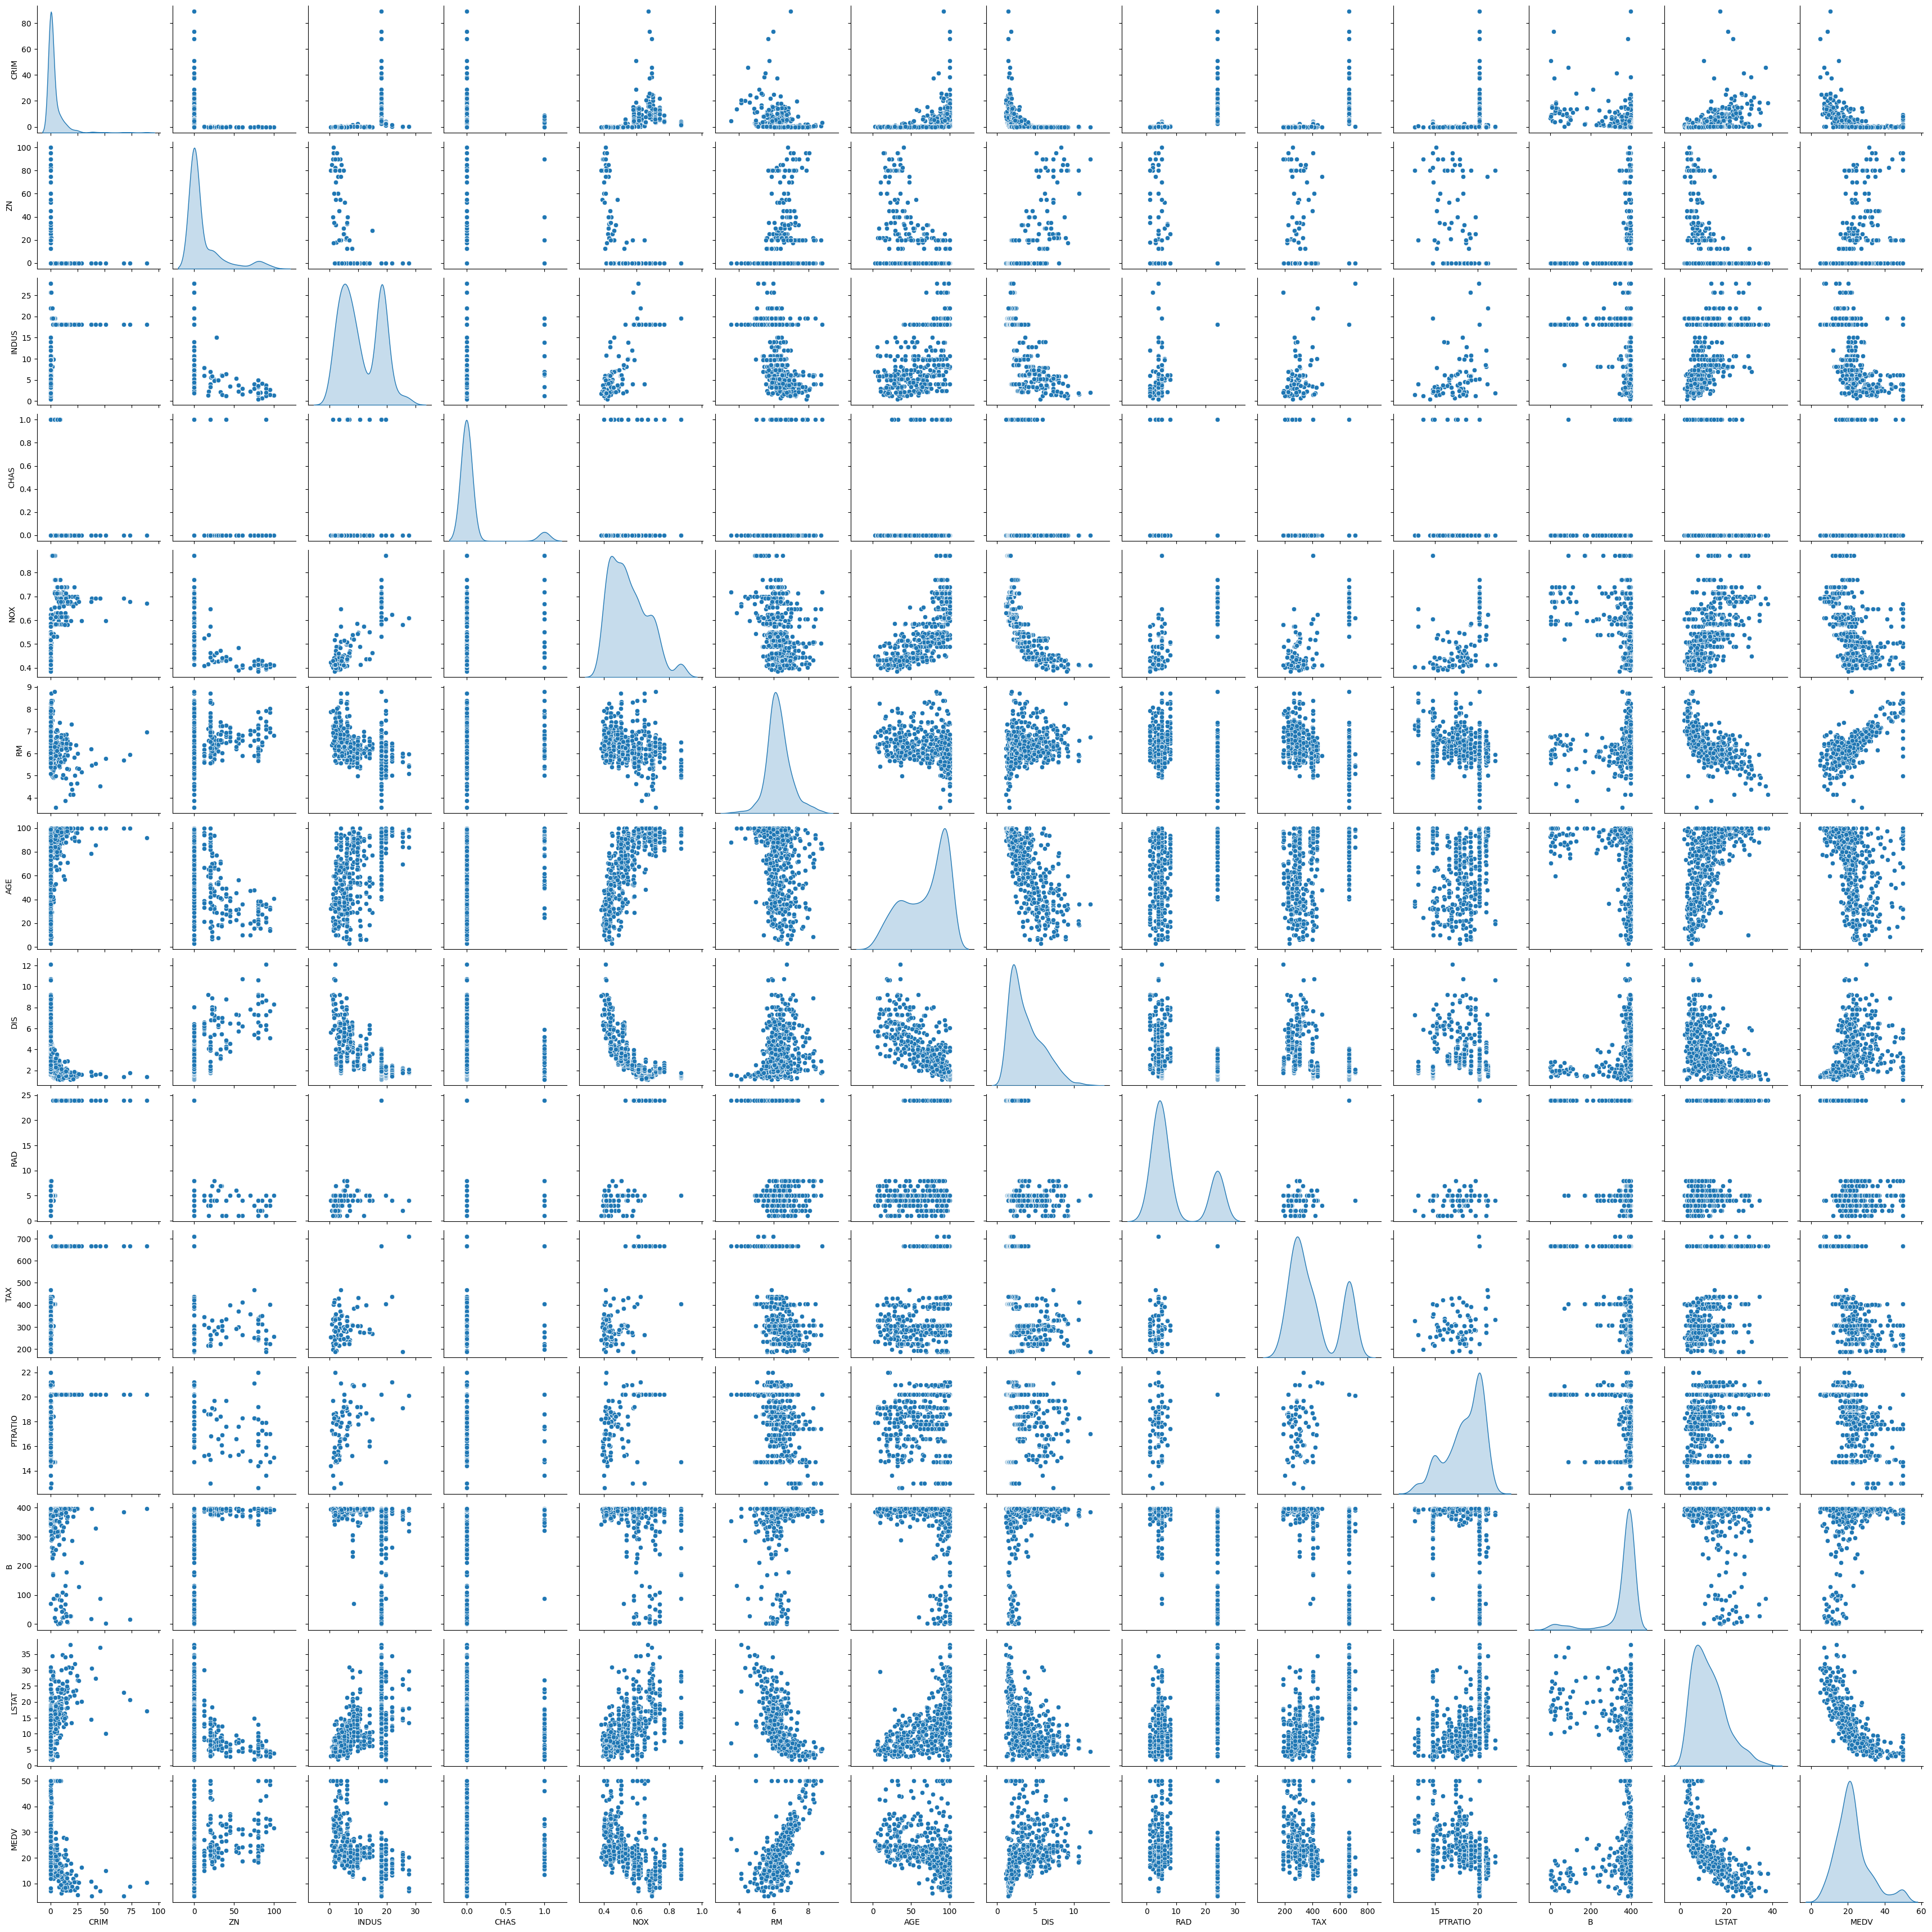

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(boston_df, diag_kind = 'kde')

<Axes: >

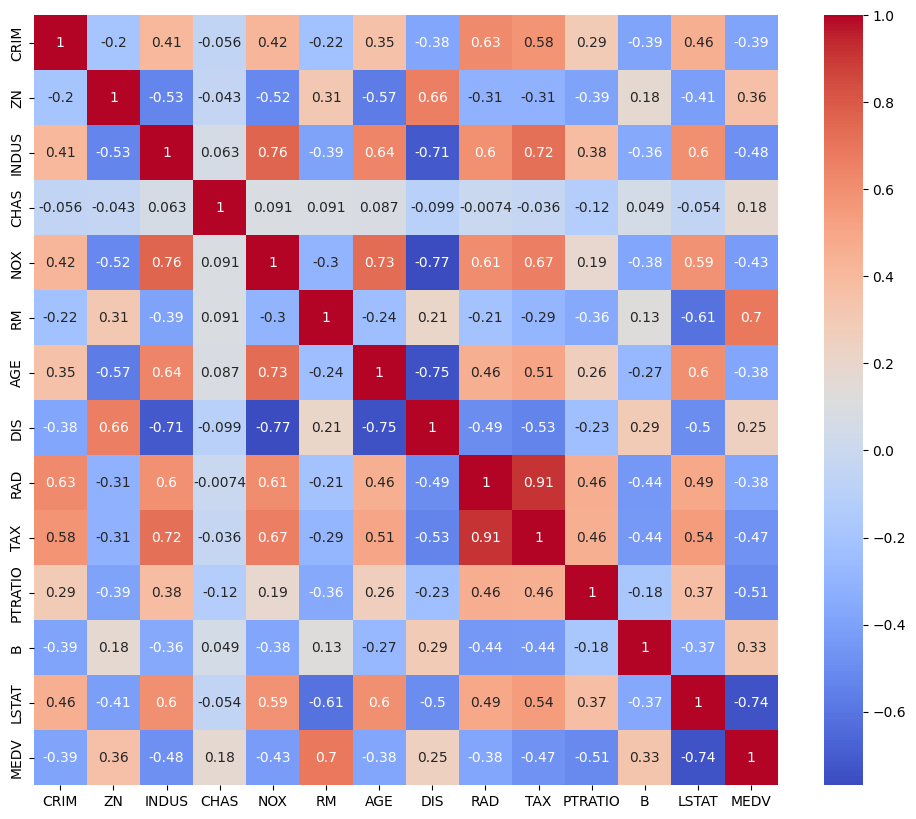

In [14]:
plt.figure(figsize=(12,10))
sns.heatmap(boston_df.corr(), annot = True, cmap = 'coolwarm')

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [23]:
x = boston_df.drop(columns=('MEDV'))
y = boston_df['MEDV']

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [25]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [44]:
Regression = LinearRegression()
Regression.fit(x_train_scaled, y_train)

LinearRegression()

In [45]:
y_pred = Regression.predict(x_test_scaled)

In [47]:
intercept = Regression.score(x_train_scaled, y_train)

In [48]:
print("The intercept for model is {}".format(intercept))

The intercept for model is 0.7434997532004697


In [50]:
Regression.score(x_test_scaled, y_test)

0.6761000049033605

In [51]:
import math
mse = np.mean(Regression.predict(x_test_scaled)-y_test)**2
math.sqrt(mse)

1.6079244721974455

In [54]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
print("Linear Regression RMSE:", mean_squared_error(y_test, y_pred))

Linear Regression RMSE: 24.13479128906756


In [61]:
from sklearn.linear_model import RidgeCV, LassoCV

In [62]:
lasso_cv = LassoCV(alphas=[0.01, 0.1, 1.0], cv=5)
lasso_cv.fit(x_train_scaled, y_train)
print("Best Aplha for Lasso:", lasso_cv.alpha_)

Best Aplha for Lasso: 0.01


In [63]:
lasso = Lasso(alpha=0.01)
lasso.fit(x_train_scaled, y_train)
y_pred_lasso = lasso.predict(x_test_scaled)
print("Lasso RMSE:", mean_squared_error(y_test, y_pred_lasso))

Lasso RMSE: 24.174962542563506


In [66]:
ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)
ridge_cv.fit(x_train_scaled, y_train)
print("Best alpha for Ridge:", ridge_cv.alpha_)

Best alpha for Ridge: 10.0


In [67]:
ridge = Ridge(alpha=10.0)
ridge.fit(x_train_scaled, y_train)
y_pred_ridge = ridge.predict(x_test_scaled)
print("Ridge RMSE:", mean_squared_error(y_test, y_pred_ridge))

Ridge RMSE: 24.364185433874894


In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_names = x.columns
lasso_coef = lasso.coef_

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'coefficient': lasso_coef
})

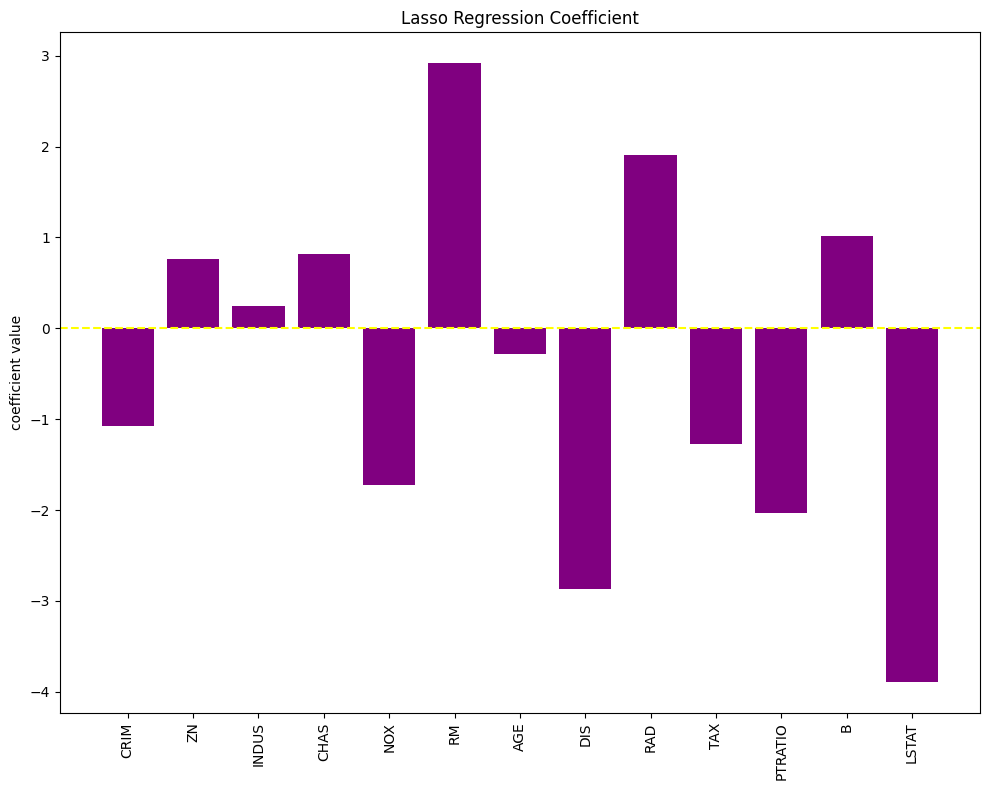

In [74]:
#Bars close to zero --means Lasso shrunk them down,Taller bars means those are important features and Bars at zero means those features are eliminated by lasso
plt.figure(figsize=(10,8))
bars = plt.bar(coef_df['Feature'], coef_df['coefficient'], color='Purple')
plt.axhline(0, color='yellow', linestyle='--')
plt.xticks(rotation=90)
plt.ylabel("coefficient value")
plt.title("Lasso Regression Coefficient")
plt.tight_layout()
plt.show()

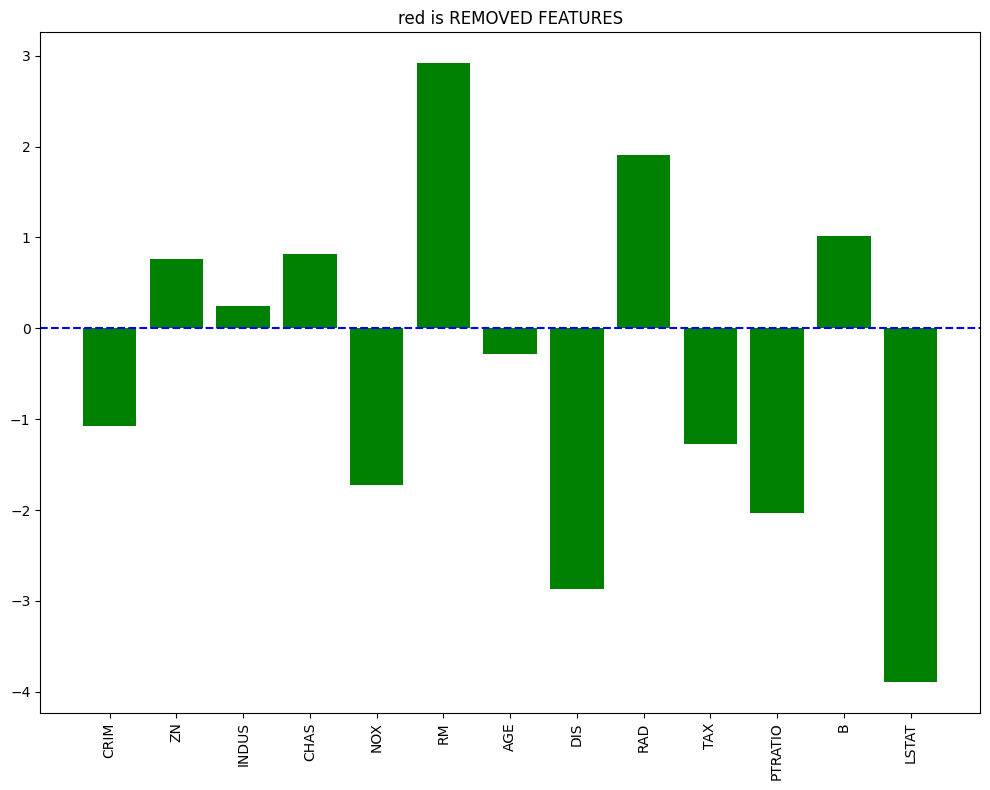

In [75]:
#Lets see those features which are eliminated by Lasso
colors = ['red' if coef == 0 else 'Green' for coef in coef_df['coefficient']]

plt.figure(figsize=(10,8))
plt.bar(coef_df['Feature'], coef_df['coefficient'], color = colors)
plt.axhline(0, color='blue', linestyle='--')
plt.xticks(rotation=90)
plt.ylabel=("coefficient value")
plt.title("red is REMOVED FEATURES")
plt.tight_layout()
plt.show()
